In [1]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv('placement.csv')

In [14]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [24]:
# Preprocessing by deleting unnamed column
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [26]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


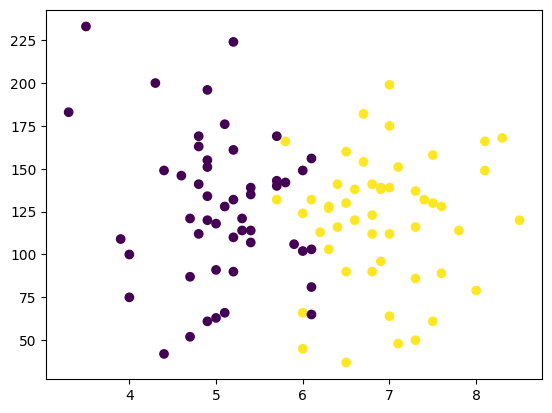

In [29]:
# EDA
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df["placement"])

In [30]:
X=df.iloc[:,:2]
y = df.iloc[:,-1]

In [38]:
# Train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1);

In [36]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [43]:
clf.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred =clf.predict(X_test)

In [45]:
y_test

96    0
27    1
37    1
66    1
48    1
83    1
41    0
87    1
94    0
76    0
Name: placement, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.8

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

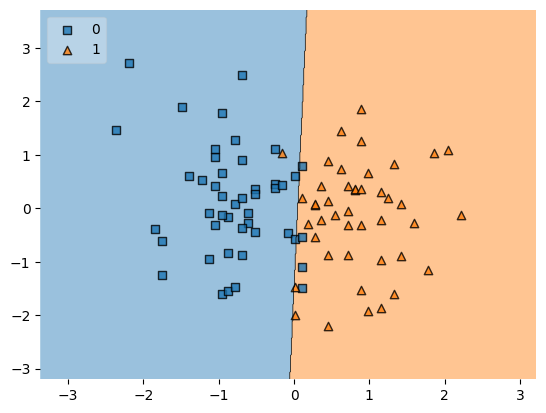

In [51]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [52]:
import pickle

In [53]:
pickle.dump(clf,open("model.pkl","wb"))